In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\krist\Downloads\ece\8ο\Αναγνωριση προτυπων\Ergastiriakes Askisis\PatRec\DATA\pima-indians-diabetes.data'
diabetes = np.loadtxt(file_path)

In [5]:
diabetes.shape

(768, 9)

In [26]:
X_ = np.concatenate([diabetes[:,:-1],np.ones((diabetes.shape[0],1))], axis=1) #add [1] to each row
X = np.concatenate([-X_[diabetes[:,-1]==1], X_[diabetes[:,-1]==0]]) #gather data to one array, multiply class 1 features by -1

In [210]:
X.shape

(768, 9)

In [189]:
def HoKashyap(X, lr, rng = np.random):
    N, K = X.shape
    b = rng.random(N)
    variations = []
    w = np.inf #w initialization for convergence test
    for i in range(1000000):
        w_old = np.copy(w) #save old w for convergence test
        w = np.linalg.inv((X.T)@X)@(X.T)@b #calculate new w
        db = lr*(X@w - b + np.abs(X@w - b)) #calculate the amount to be added to b

        if ((X@w)>0).all() or np.sum(np.abs(w - w_old))<1e-5: #check if samples linearly seperable and for convergence
            break
        else: #else calculate new b
            variations.append(np.sum(np.abs(w - w_old)))
            b += db
    
    return w, variations[1:]

In [179]:
w, progress = HoKashyap(X, 0.1,np.random.RandomState(69))
#print('error_rate:',np.sum((X@w)<=0)/768)

In [208]:
errors = {}
for i in range(100):
    w, progress = HoKashyap(X, 0.1)
    errors.update({np.sum((X@w)<=0)/768 : w})

print(errors[min(errors)])
print(f' minimum error: {min(errors)}\n mean error: {np.mean(list(errors.keys()))}')

[-2.59730271e-02 -7.31696281e-03  2.89099573e-03  9.29782322e-04
  1.84382520e-04 -2.50237155e-02 -2.28933215e-01 -3.95748533e-03
  1.99659887e+00]
 minimum error: 0.21484375
 mean error: 0.22465277777777776


In [ ]:
#normalize data
X_norm = np.copy(X)
for i in range(X.shape[1]-1):
    X_norm[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std() 

In [209]:
errors = {}
for i in range(100):
    w, progress = HoKashyap(X_norm, 0.1)
    errors.update({np.sum((X_norm@w)<=0)/768 : w})
    
print(errors[min(errors)])
print(f' minimum error: {min(errors)}\n mean error: {np.mean(list(errors.keys()))}')

[-0.19892147 -1.55656135 -0.37057464 -0.20497577  0.21475575 -2.1971695
 -0.16607963 -0.64476032  5.38541442]
 minimum error: 0.014322916666666666
 mean error: 0.018880208333333332


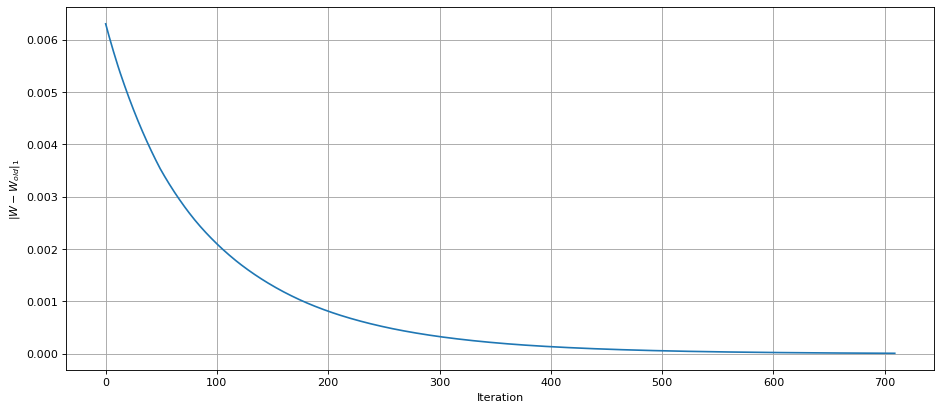

In [206]:
plt.figure(figsize=(14, 6), dpi=80)
w, progress = HoKashyap(X, 0.01)
plt.plot(progress)
plt.xlabel("Iteration")
plt.ylabel("$|W-W_{old}|_{1}$")
plt.grid(color='0.65')

In [190]:
c = [j*10**(-i) for i in range(5,0,-1) for j in range(1,10)] #learning rates we will use
iterations = [] #list that will store errors for each lr
for i in c: #for each lr call perceptron and calculate the classification error
    w, progress = HoKashyap(X, i,np.random.RandomState(69))
    iterations.append(len(progress))

([<matplotlib.axis.XTick at 0x27f871b0f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

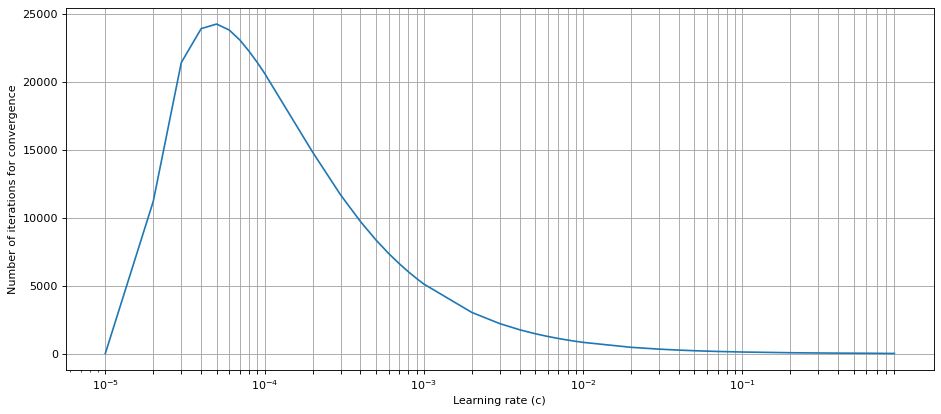

In [191]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(c,iterations)
plt.xlabel("Learning rate (c)")
plt.ylabel("Number of iterations for convergence")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(c)

In [192]:
c = [j*10**(-i) for i in range(4,0,-1) for j in range(1,10)] #learning rates we will use
iterations = [] #list that will store errors for each lr
for i in c: #for each lr call perceptron and calculate the classification error
    w, progress = HoKashyap(X_norm, i,np.random.RandomState(69))
    iterations.append(len(progress))

([<matplotlib.axis.XTick at 0x27f878db820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

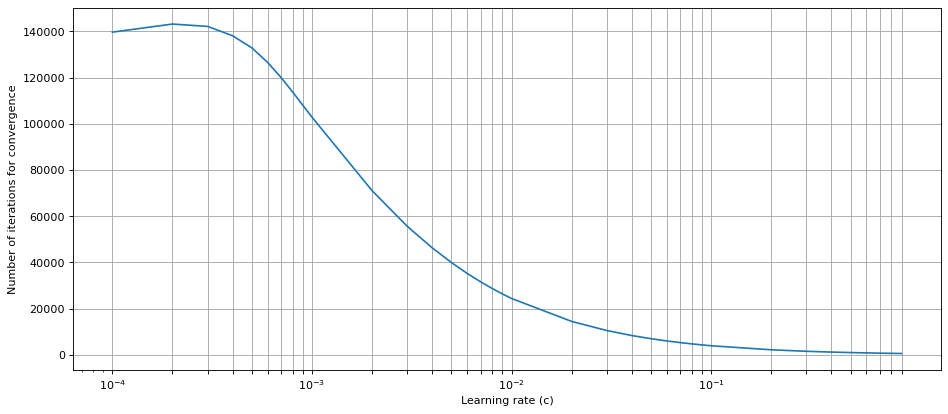

In [193]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(c,iterations)
plt.xlabel("Learning rate (c)")
plt.ylabel("Number of iterations for convergence")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(c)

In [194]:
c = [j*10**(-i) for i in range(5,0,-1) for j in range(1,10)] #learning rates we will use
errors = [] #list that will store errors for each lr
for i in c: #for each lr call perceptron and calculate the classification error
    w, progress = HoKashyap(X, i,np.random.RandomState(69))
    errors.append(np.sum((X@w)<=0)/768)

([<matplotlib.axis.XTick at 0x27f85accf40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

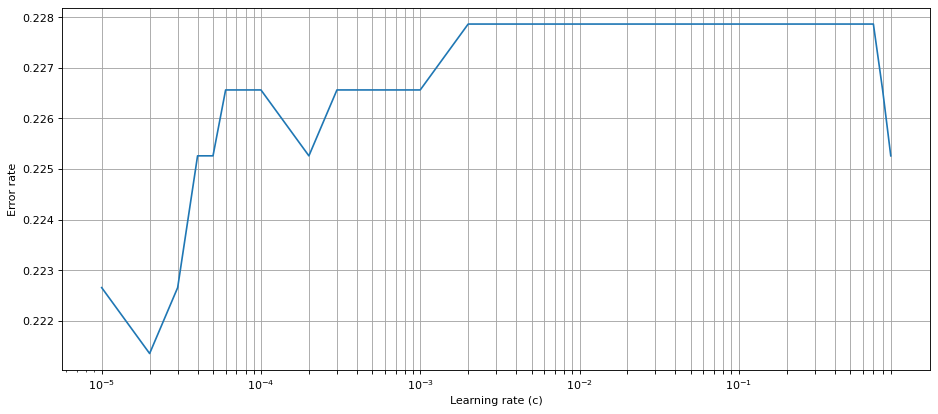

In [195]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(c,errors)
plt.xlabel("Learning rate (c)")
plt.ylabel("Error rate")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(c)

In [196]:
c = [j*10**(-i) for i in range(4,0,-1) for j in range(1,10)] #learning rates we will use
errors = [] #list that will store errors for each lr
for i in c: #for each lr call perceptron and calculate the classification error
    w, progress = HoKashyap(X_norm, i,np.random.RandomState(69))
    errors.append(np.sum((X_norm@w)<=0)/768)

([<matplotlib.axis.XTick at 0x27f87904d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

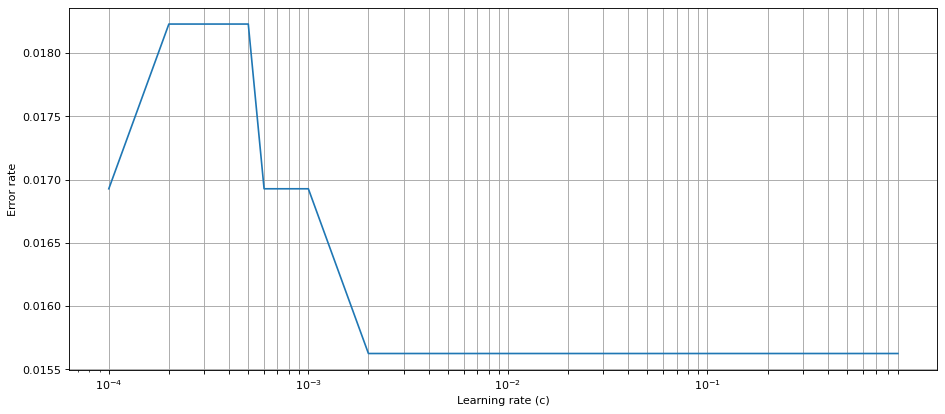

In [197]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(c,errors)
plt.xlabel("Learning rate (c)")
plt.ylabel("Error rate")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(c)